In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [13]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=26)

In [14]:
# fit the rf classfier model with 5 trees
rf = RandomForestClassifier(n_estimators=5, random_state=3).fit(X_train, y_train)
print('Training set score: {}'.format(rf.score(X_train, y_train)))
print('Testing set score: {}'.format(rf.score(X_test, y_test)))

Training set score: 0.96
Testing set score: 0.92


In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [24]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(cancer.data, cancer.target, 
                                                       stratify=cancer.target, random_state=30)

In [25]:
# fit the rf classfier model with 5 trees
cancer_rf5 = RandomForestClassifier(n_estimators=5, random_state=3).fit(X_train_cancer, y_train_cancer)

In [26]:
print('Training set score: {}'.format(cancer_rf5.score(X_train_cancer, y_train_cancer)))
print('Testing set score: {}'.format(cancer_rf5.score(X_test_cancer, y_test_cancer)))

Training set score: 0.9929577464788732
Testing set score: 0.9440559440559441


In [27]:
# fit the rf classfier model with 100 trees
cancer_rf100 = RandomForestClassifier(n_estimators=100, random_state=6).fit(X_train_cancer, y_train_cancer)

print('Training set score: {}'.format(cancer_rf100.score(X_train_cancer, y_train_cancer)))
print('Testing set score: {}'.format(cancer_rf100.score(X_test_cancer, y_test_cancer)))

Training set score: 1.0
Testing set score: 0.951048951048951


In [45]:
feature_imp_df = pd.DataFrame([cancer.feature_names, cancer_rf100.feature_importances_])
feature_imp_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,0.0431662,0.00972197,0.0312348,0.0629866,0.00509484,0.0104226,0.0722975,0.0852592,0.00382669,0.00369054,...,0.109171,0.0115442,0.125775,0.0883194,0.0110594,0.0134035,0.0320975,0.150463,0.0154352,0.00652518


In [46]:
feature_imp_df = feature_imp_df.transpose()
feature_imp_df.columns = ['feature_names', 'feature_importances']
feature_imp_df

,feature_names,feature_importances
0,mean radius,0.0431662
1,mean texture,0.00972197
2,mean perimeter,0.0312348
3,mean area,0.0629866
4,mean smoothness,0.00509484
5,mean compactness,0.0104226
6,mean concavity,0.0722975
7,mean concave points,0.0852592
8,mean symmetry,0.00382669
9,mean fractal dimension,0.00369054


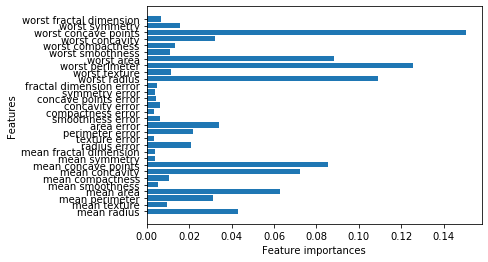

In [42]:
n_features = len(feature_imp_df.index)
plt.barh(range(n_features), feature_imp_df.feature_importances)
plt.yticks(range(n_features), feature_imp_df.feature_names)
plt.xlabel('Feature importances')
plt.ylabel('Features')
plt.show()